# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfQuickSort = pd.read_csv("Results16/quickSort-PC16.csv")
dfQuickSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfBubbleSort = pd.read_csv("Results16/bubbleSort-PC16.csv")
dfBubbleSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfMergeSort = pd.read_csv("Results16/mergeSort-PC16.csv")
dfMergeSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


#### Moving information from Test name to a seperate column 

In [2]:
#input type
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[0])

dfCounting["Input case"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[0])

dfQuickSort["Input case"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[0])

dfBubbleSort["Input case"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[0])

dfMergeSort["Input case"] = l

In [3]:
#input size
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[1])

dfCounting["Size"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[1])

dfQuickSort["Size"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[1])

dfBubbleSort["Size"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[1])

dfMergeSort["Size"] = l


l = []
for i in range(len(dfReadCSV)):
    l.append(dfReadCSV.iloc[i]["Test name"].split("d")[-1])

dfReadCSV["Size"] = l

In [4]:


#removing values that are nonsense 
dfCounting = dfCounting[dfCounting['PKG (J)'] >= 0]
dfCounting = dfCounting[dfCounting['CPU (J)'] >= 0]
#df = df[df['Memory (byte)'] >= 0]
#df = df[df['Temperature'] >= 0]
dfCounting = dfCounting[dfCounting['Time (ms)'] >= 0]

dfCounting = dfCounting.replace("  ", np.nan)

#missing values for each column
print("MISSING DATA: \n\n ", dfCounting.isnull().sum(axis=0))

dfReadCSV["Time (ms)"].sum()/1000/60/60


MISSING DATA: 

  Test name          0
PKG (J)            0
CPU (J)            0
GPU (J)        20799
Memory (J)         0
Temperature        0
Time (ms)          0
Input case         0
Size               0
dtype: int64


5.783314213333333

#### Removing ourliers

#### Subtract readCSV from data

In [5]:
#Counting sort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingRand{s[size]}"].mean())

for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingBest{s[size]}"].mean())

for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingWorst{s[size]}"].mean())

for i in range(len(dfCounting)):
    for size in range(len(s)):
        if (int(dfCounting["Size"][i]) == s[size]):
            if(dfCounting["Input case"][i] != "worst" and dfCounting["Input case"][i] != "best"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfCounting["Input case"][i] == "best"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGBest[size]["CPU (J)"])                                         
            if(dfCounting["Input case"][i] == "worst"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGWorst[size]["CPU (J)"])                               

dfCounting["CPU - BG"] = l
dfCounting[dfCounting["Input case"] == "best"]


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
10399,best-25000-1,1.878296,1.601929,NaN,0.118958,62,223.673,best,25000,NaN
10400,best-25000-1,1.876892,1.619263,NaN,0.113342,62,195.949,best,25000,NaN
10401,best-25000-1,1.891479,1.635620,NaN,0.111633,62,196.755,best,25000,NaN
10402,best-25000-1,1.797913,1.523071,NaN,0.118103,62,216.795,best,25000,NaN
10403,best-25000-1,1.755127,1.432678,NaN,0.127747,62,281.388,best,25000,NaN
...,...,...,...,...,...,...,...,...,...,...
15594,best-1000000-1,6.719788,5.797974,NaN,0.380432,71,713.453,best,1000000,NaN
15595,best-1000000-1,6.539246,5.623535,NaN,0.380737,71,725.147,best,1000000,NaN
15596,best-1000000-1,6.512512,5.608704,NaN,0.366638,71,724.385,best,1000000,NaN
15597,best-1000000-1,6.630493,5.714172,NaN,0.381470,70,707.163,best,1000000,NaN


In [6]:
#Bubblesort
bgAVGbubbleRand = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGbubbleRand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())

for i in range(len(dfBubbleSort)):
    for size in range(len(s)):
        if (int(dfBubbleSort["Size"][i]) == s[size]):
            if(dfBubbleSort["Input case"][i] != "worst" and dfBubbleSort["Input case"][i] != "best"):
                l.append(dfBubbleSort["CPU (J)"][i] - bgAVGbubbleRand[size]["CPU (J)"])
            if(dfBubbleSort["Input case"][i] == "best"):
                l.append(0)                                         # We're missing sorted. Has been named "revsorted" in the Makefile for readCSV
            if(dfBubbleSort["Input case"][i] == "worst"):
                l.append(0)                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfBubbleSort["CPU - BG"] = l

dfBubbleSort


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
0,random1-25000-1,13.232300,11.544128,,0.399902,69,1710.16,random1,25000,NaN
1,random1-25000-1,14.163696,12.361511,,0.493103,69,1723.56,random1,25000,NaN
2,random1-25000-1,13.530029,11.768127,,0.451172,69,1730.49,random1,25000,NaN
3,random1-25000-1,14.085632,12.302307,,0.486084,70,1704.74,random1,25000,NaN
4,random1-25000-1,14.142822,12.376465,,0.485718,70,1699.14,random1,25000,NaN
...,...,...,...,...,...,...,...,...,...,...
11755,worst-500000-1,815.602600,719.116455,,18.233643,64,107186.00,worst,500000,0.0
11756,worst-500000-1,806.500366,709.628906,,19.146301,57,107578.00,worst,500000,0.0
11757,worst-500000-1,808.787598,712.215637,,18.715515,63,107361.00,worst,500000,0.0
11758,worst-500000-1,810.676819,712.063965,,20.324219,57,108984.00,worst,500000,0.0


In [7]:
#Mergesort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())
for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeWorst{s[size]}"].mean())
for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeBest{s[size]}"].mean())

for i in range(len(dfMergeSort)):
    for size in range(len(s)):
        if (int(dfMergeSort["Size"][i]) == s[size]):
            if(dfMergeSort["Input case"][i] != "worst" and dfMergeSort["Input case"][i] != "best"):
                l.append(dfMergeSort["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfMergeSort["Input case"][i] == "best"):
                l.append(0)                                         # We're missing sorted. Has been named "revsorted" in the Makefile for readCSV
            if(dfMergeSort["Input case"][i] == "worst"):
                l.append(dfMergeSort["CPU (J)"][i] - bgAVGWorst[size]["CPU (J)"])                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfMergeSort["CPU - BG"] = l

dfMergeSort[dfMergeSort["Input case"]=="best"]


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
6399,best-25000-1,2.144348,1.843567,,0.133606,72,209.112,best,25000,0.0
6400,best-25000-1,2.076294,1.757446,,0.127869,72,241.316,best,25000,0.0
6401,best-25000-1,2.113647,1.822815,,0.119995,72,212.796,best,25000,0.0
6402,best-25000-1,2.221313,1.927490,,0.131714,72,214.291,best,25000,0.0
6403,best-25000-1,2.150085,1.861267,,0.121155,72,212.584,best,25000,0.0
...,...,...,...,...,...,...,...,...,...,...
11594,best-1000000-1,7.467285,6.437561,,0.411072,72,805.561,best,1000000,0.0
11595,best-1000000-1,8.039001,6.894043,,0.473633,72,861.733,best,1000000,0.0
11596,best-1000000-1,7.963867,6.857239,,0.462646,71,828.897,best,1000000,0.0
11597,best-1000000-1,8.168213,7.050232,,0.470093,71,841.059,best,1000000,0.0


In [8]:
#Quicksort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())
for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeWorst{s[size]}"].mean())
for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVQuickBest{s[size]}"].mean())

for i in range(len(dfQuickSort)):
    for size in range(len(s)):
        if (int(dfQuickSort["Size"][i]) == s[size]):
            if(dfQuickSort["Input case"][i] != "worst" and dfQuickSort["Input case"][i] != "best"):
                l.append(dfQuickSort["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfQuickSort["Input case"][i] == "best"):
                l.append(dfQuickSort["CPU (J)"][i] - bgAVGBest[size]["CPU (J)"])                                         
            if(dfQuickSort["Input case"][i] == "worst"):
                l.append(0)                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfQuickSort["CPU - BG"] = l

## PLOTS

#### Basic plots (raw data vs size/time)

<AxesSubplot:title={'center':'countingsort data'}, xlabel='Size', ylabel='CPU (J)'>

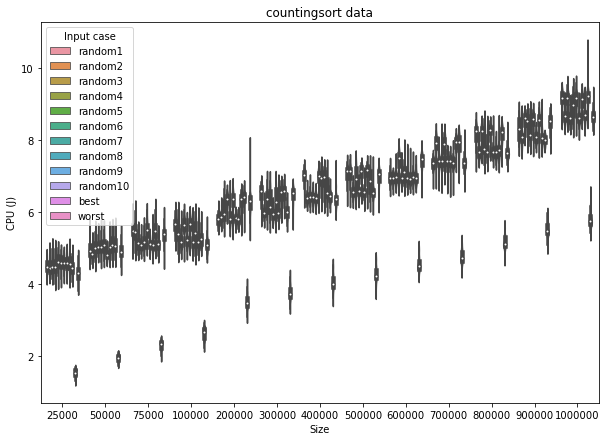

In [177]:
plt.figure(figsize=(10,7))
plt.title("countingsort data")
sns.violinplot(data = dfCounting, y = "CPU (J)", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Quicksort data'}, xlabel='Size', ylabel='Time (ms)'>

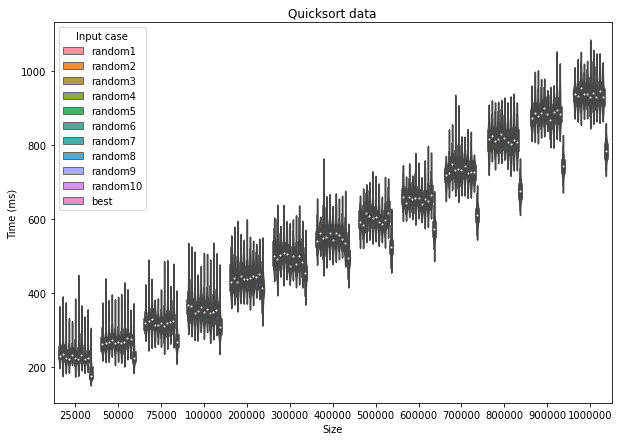

In [10]:
plt.figure(figsize=(10,7))
plt.title("Quicksort data")
sns.violinplot(data = dfQuickSort[dfQuickSort["Input case"] != "worst"], y = "Time (ms)", x = "Size", hue ="Input case")

<AxesSubplot:title={'center':'Bubblesort data'}, xlabel='Size', ylabel='Time (ms)'>

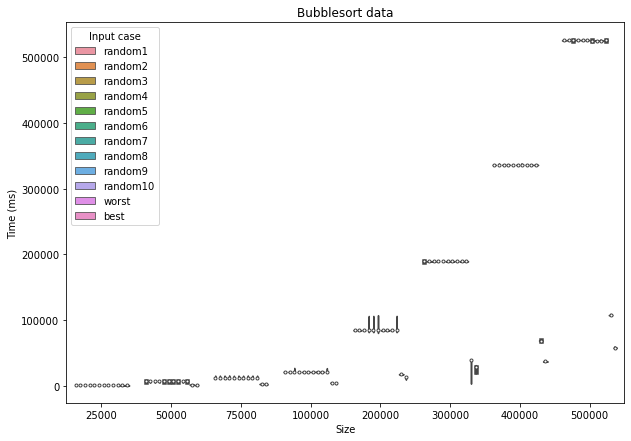

In [11]:
plt.figure(figsize=(10,7))
plt.title("Bubblesort data")
sns.violinplot(data = dfBubbleSort, y = "Time (ms)", x = "Size", hue ="Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='Time (ms)'>

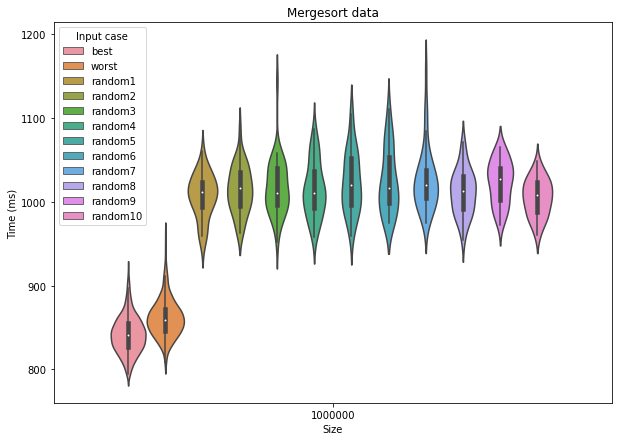

In [12]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data")
sns.violinplot(data = dfMergeSort[dfMergeSort["Size"] == "1000000"], y = "Time (ms)", x = "Size", hue ="Input case")

## ReadCSV subtracted from data PLOTS

<AxesSubplot:title={'center':'countingsort data'}, xlabel='Size', ylabel='CPU - BG'>

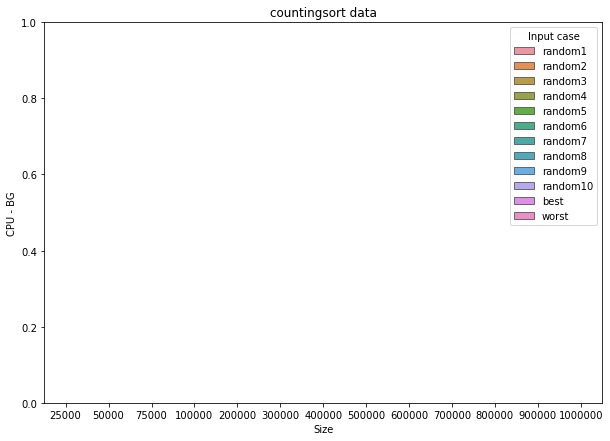

In [13]:
plt.figure(figsize=(10,7))
plt.title("countingsort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfCounting, y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='CPU - BG'>

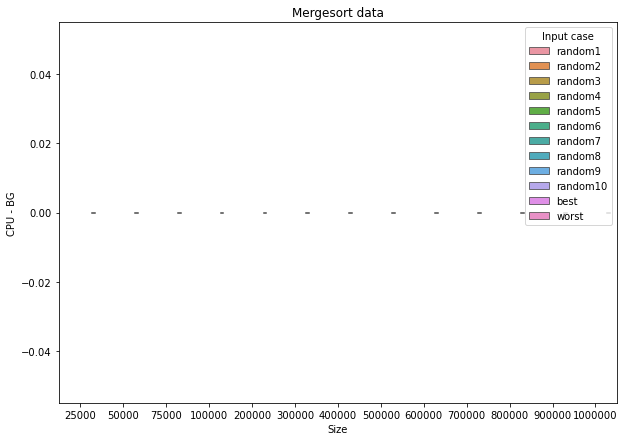

In [14]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfMergeSort, y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='CPU - BG'>

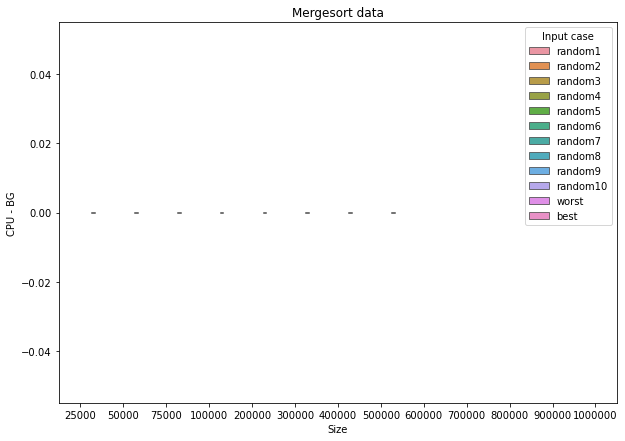

In [15]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfQuickSort, y = "CPU - BG", x = "Size", hue = "Input case")

<AxesSubplot:title={'center':'Mergesort data'}, xlabel='Size', ylabel='CPU - BG'>

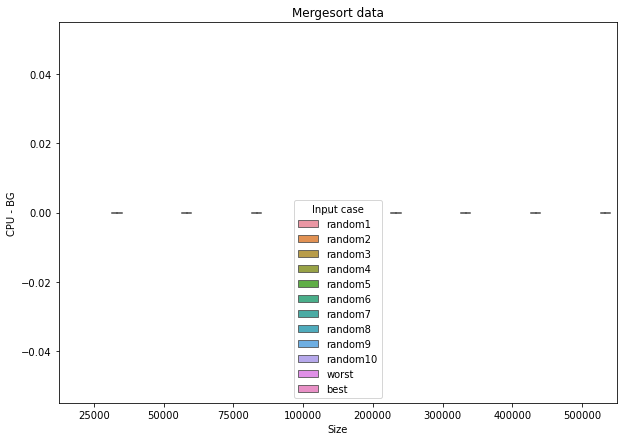

In [16]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfBubbleSort, y = "CPU - BG", x = "Size", hue = "Input case")

## Mean for each computer


#### Quicksort

In [17]:
quick16 = pd.read_csv("Results16/quickSort-PC16.csv")
quick16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
quick21 = pd.read_csv("Results21/quickSort-PC21.csv")
quick21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
quick23 = pd.read_csv("Results23/quickSort-PC23.csv") 
quick23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
quick6 = pd.read_csv("Results6/quickSort-PC6.csv")
quick6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


readCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
readCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
readCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
readCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
readCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

In [18]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

quick21 = removeNonsense(quick21)
quick16 = removeNonsense(quick16)
quick23 = removeNonsense(quick23)
quick6 = removeNonsense(quick6)


readCSV21 = removeNonsense(readCSV21)
readCSV16 = removeNonsense(readCSV16)
readCSV23 = removeNonsense(readCSV23)
readCSV6 = removeNonsense(readCSV6)
readCSV16


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms)
0,readCSV-Random1-25000,2.240601,1.966187,,0.134399,53,227.880
1,readCSV-Random1-25000,2.062317,1.775085,,0.126160,53,250.212
2,readCSV-Random1-25000,2.140869,1.876709,,0.121887,53,222.526
3,readCSV-Random1-25000,2.217102,1.940735,,0.133545,53,226.620
4,readCSV-Random1-25000,2.058533,1.796814,,0.119385,53,219.516
...,...,...,...,...,...,...,...
41594,readCSV-Sorted-1000000,7.584045,6.620728,,0.382446,69,805.509
41595,readCSV-Sorted-1000000,7.647522,6.666382,,0.386780,69,817.192
41596,readCSV-Sorted-1000000,7.715393,6.740112,,0.386230,70,828.109
41597,readCSV-Sorted-1000000,7.573486,6.611694,,0.383301,70,816.762


In [19]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l
makeinputColumn(quick21)
makeinputColumn(quick23)
makeinputColumn(quick6)
makeinputColumn(quick16)
print(quick21)

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
makeinputColumn_readCSV(readCSV16)
makeinputColumn_readCSV(readCSV21)
makeinputColumn_readCSV(readCSV23)
makeinputColumn_readCSV(readCSV6)


             Test name   PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
0      random1-25000-1  2.153381  1.893677            0.124512           29   
1      random1-25000-1  2.171021  1.890686            0.123047           29   
2      random1-25000-1  2.138184  1.884949            0.119690           29   
3      random1-25000-1  2.313232  2.037598            0.137939           29   
4      random1-25000-1  2.163818  1.899353            0.129150           29   
...                ...       ...       ...     ...         ...          ...   
14073   best-1000000-1  7.644104  6.685913            0.410217           64   
14074   best-1000000-1  7.567322  6.655640            0.413513           64   
14075   best-1000000-1  7.379944  6.455933            0.386841           64   
14076   best-1000000-1  7.692749  6.727966            0.417664           65   
14077   best-1000000-1  7.254028  6.377808            0.378906           65   

       Time (ms) Input case  
0        220.583    r

In [20]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(quick21)
makeSizecolumn(quick23)
makeSizecolumn(quick6)
makeSizecolumn(quick16)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

makeSizecolumn_readCSV(readCSV16)
makeSizecolumn_readCSV(readCSV21)
makeSizecolumn_readCSV(readCSV23)
makeSizecolumn_readCSV(readCSV6)

In [21]:
quick16

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
0,random1-25000-1,1.962158,1.692078,,0.127014,34,229.315,random1,25000
1,random1-25000-1,2.023621,1.674500,,0.149536,34,328.975,random1,25000
2,random1-25000-1,2.120483,1.841614,,0.138977,34,228.547,random1,25000
3,random1-25000-1,2.118164,1.841858,,0.134216,34,228.787,random1,25000
4,random1-25000-1,2.049316,1.782532,,0.127319,34,222.677,random1,25000
...,...,...,...,...,...,...,...,...,...
14073,best-1000000-1,7.147827,6.179016,,0.391418,68,793.451,best,1000000
14074,best-1000000-1,7.349426,6.347900,,0.425720,68,796.630,best,1000000
14075,best-1000000-1,7.313232,6.347717,,0.419617,68,757.244,best,1000000
14076,best-1000000-1,7.535034,6.532166,,0.428528,68,792.646,best,1000000


### remove outliers

In [22]:
def remove_outliers(df, type, size):
    q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR

    print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] >= LF]

In [147]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    for case in range(len(c)):
        for size in range(len(s)):
            remove_outliers(df, c[case], s[size])
remove_outliers_for_pc(quick16)
remove_outliers_for_pc(quick6)
remove_outliers_for_pc(quick21)
remove_outliers_for_pc(quick23)

remove_outliers_for_pc(readCSV16)
remove_outliers_for_pc(readCSV21)
remove_outliers_for_pc(readCSV23)
remove_outliers_for_pc(readCSV6)

C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\2629238994.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\2629238994.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\2629238994.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]


For size, case: 25000,best. Lower fence: 1.1214447021484375 Upper fence: 1.6398773193359375.
For size, case: 50000,best. Lower fence: 1.5760040283203125 Upper fence: 2.1419219970703125.
For size, case: 75000,best. Lower fence: 1.9684066772460938 Upper fence: 2.7023544311523438.
For size, case: 100000,best. Lower fence: 2.2197113037109375 Upper fence: 3.2438812255859375.
For size, case: 200000,best. Lower fence: 3.143676757812499 Upper fence: 4.161743164062501.
For size, case: 300000,best. Lower fence: 3.731208801269532 Upper fence: 4.32135772705078.
For size, case: 400000,best. Lower fence: 4.167808532714844 Upper fence: 4.639060974121094.
For size, case: 500000,best. Lower fence: 3.9255599975585938 Upper fence: 5.155357360839844.
For size, case: 600000,best. Lower fence: 4.7434844970703125 Upper fence: 5.1977081298828125.
For size, case: 700000,best. Lower fence: 5.037628173828125 Upper fence: 5.560089111328125.
For size, case: 800000,best. Lower fence: 5.5001220703125 Upper fence: 5.

In [148]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def meanData(df,typ,size):
    mean = df[df["Input case"] == typ][df["Size"]==size].mean()
    mean["Input case"] = typ
    return mean

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    list_of_means = []
    for case in range(len(c)):
        for size in range(len(s)):
            list_of_means.append(meanData(df, c[case], s[size])) 
    return list_of_means


mean16 = mean_of_dataset(quick16)
mean21 = mean_of_dataset(quick21)
mean23 = mean_of_dataset(quick23)
mean6 = mean_of_dataset(quick6)

C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\1204494362.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean = df[df["Input case"] == typ][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\1204494362.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df[df["Input case"] == typ][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\1204494362.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean = df[df["Input case"] == typ][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\1204494362.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid 

In [178]:
mean16

[PKG (J)                    2.094691
 CPU (J)                      1.8086
 Memory (J)                 0.136229
 Temperature               39.512821
 Time (ms)                243.222487
 Size                        25000.0
 Input case                  random1
 CPU - readCSV              -0.06193
 Time - readCSV             8.742846
 Memory - readCSV           0.007196
 % of energy is Memory      7.004673
 dtype: object,
 PKG (J)                   2.59908
 CPU (J)                  2.251945
 Memory (J)               0.157658
 Temperature                59.425
 Time (ms)                267.5455
 Size                      50000.0
 Input case                random1
 CPU - readCSV            0.089188
 Time - readCSV          -1.355225
 Memory - readCSV         0.006833
 % of energy is Memory    6.542917
 dtype: object,
 PKG (J)                    3.319864
 CPU (J)                    2.889552
 Memory (J)                 0.198775
 Temperature                   63.45
 Time (ms)                32

In [150]:


# def mean_of_dataset_readCSV(df):
#     s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
#     c = list_of_case(df)
#     list_of_means = []
#     for case in range(len(c)):
#         for size in range(len(s)):
#             list_of_means.append(meanData(df, c[case], s[size]))   
#     return list_of_means

# avg16_readCSV = mean_of_dataset_readCSV(readCSV16)
# avg21_readCSV = mean_of_dataset_readCSV(readCSV21)
# avg23_readCSV = mean_of_dataset_readCSV(readCSV23)
# avg6_readCSV = mean_of_dataset_readCSV(readCSV6)





In [151]:
mean16

[PKG (J)          2.094691
 CPU (J)            1.8086
 Memory (J)       0.136229
 Temperature     39.512821
 Time (ms)      243.222487
 Size              25000.0
 Input case        random1
 dtype: object,
 PKG (J)         2.59908
 CPU (J)        2.251945
 Memory (J)     0.157658
 Temperature      59.425
 Time (ms)      267.5455
 Size            50000.0
 Input case      random1
 dtype: object,
 PKG (J)          3.319864
 CPU (J)          2.889552
 Memory (J)       0.198775
 Temperature         63.45
 Time (ms)      323.960325
 Size              75000.0
 Input case        random1
 dtype: object,
 PKG (J)          3.786298
 CPU (J)          3.295375
 Memory (J)       0.223509
 Temperature        67.425
 Time (ms)      369.893775
 Size             100000.0
 Input case        random1
 dtype: object,
 PKG (J)          4.655281
 CPU (J)          4.057973
 Memory (J)       0.268748
 Temperature        69.425
 Time (ms)      444.526875
 Size             200000.0
 Input case        random1
 dtyp

In [176]:
def make_sub_readCSV(inList):
    for i in range(len(inList)):
        case = inList[i]["Input case"]
        size = inList[i]["Size"]
        if case=="best":
            case = "quickbest"
        if case=="worst":
            case = "reversesorted"
        inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
        inList[i]["Time - readCSV"] = inList[i]["Time (ms)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Time (ms)"]
        inList[i]["Memory - readCSV"] = inList[i]["Memory (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Memory (J)"]
        inList[i]["% of energy is Memory"] = (inList[i]["Memory (J)"] / (inList[i]["CPU (J)"] + inList[i]["Memory (J)"]))*100 
        

make_sub_readCSV(mean16)
make_sub_readCSV(mean21)
make_sub_readCSV(mean23)
make_sub_readCSV(mean6)



C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\2821578739.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\2821578739.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
C:\Users\mathi\AppData\Local\Temp\ipykernel_23196\2821578739.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inList[i]["Time - readCSV"] = inList[i]["Time (ms)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Time (ms)"]
C:\User

In [153]:
mean16[150]

PKG (J)               5.248731
CPU (J)                4.55295
Memory (J)            0.308449
Temperature             68.765
Time (ms)           525.528165
Size                  500000.0
Input case                best
CPU - readCSV        -0.093942
Time - readCSV      -13.945915
Memory - readCSV      0.019032
dtype: object

In [175]:
(0.243954 / (5.127921 + 0.243954))*100

4.54131937172775

In [173]:
mean16[130]

PKG (J)                    5.856885
CPU (J)                    5.127921
Memory (J)                 0.243954
Temperature                 71.0325
Time (ms)                608.482677
Size                        25000.0
Input case                    worst
CPU - readCSV              3.453676
Time - readCSV           397.697067
Memory - readCSV           0.127216
% of energy is Memory     29.152823
dtype: object

# % of energy is Memory

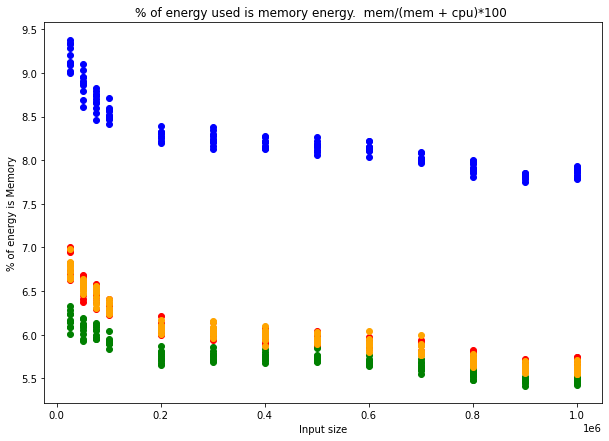

In [181]:
c = "worst" 
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["% of energy is Memory"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["% of energy is Memory"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["% of energy is Memory"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["% of energy is Memory"],"o", color = "orange")

plt.title("% of energy used is memory energy.  mem/(mem + cpu)*100 ")
plt.xlabel("Input size")
plt.ylabel("% of energy is Memory")
plt.show()


# CPU (J)

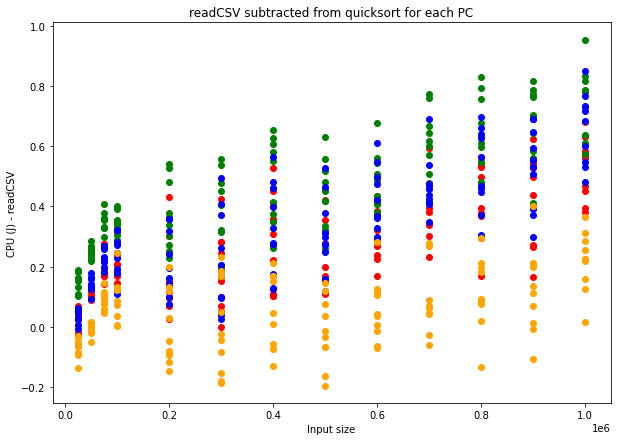

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


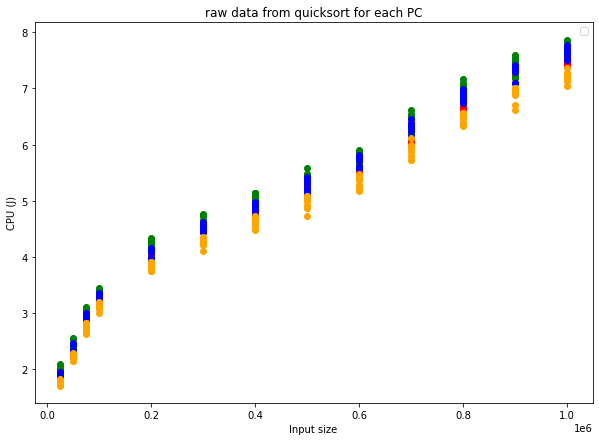

In [155]:
c = "worst" 
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.title("readCSV subtracted from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("CPU (J) - readCSV")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)): # == c:
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("raw data from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("CPU (J)")
plt.legend()
plt.show()

# Memory (J)

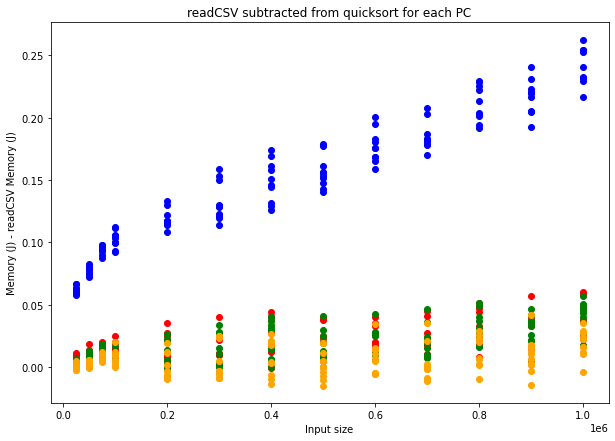

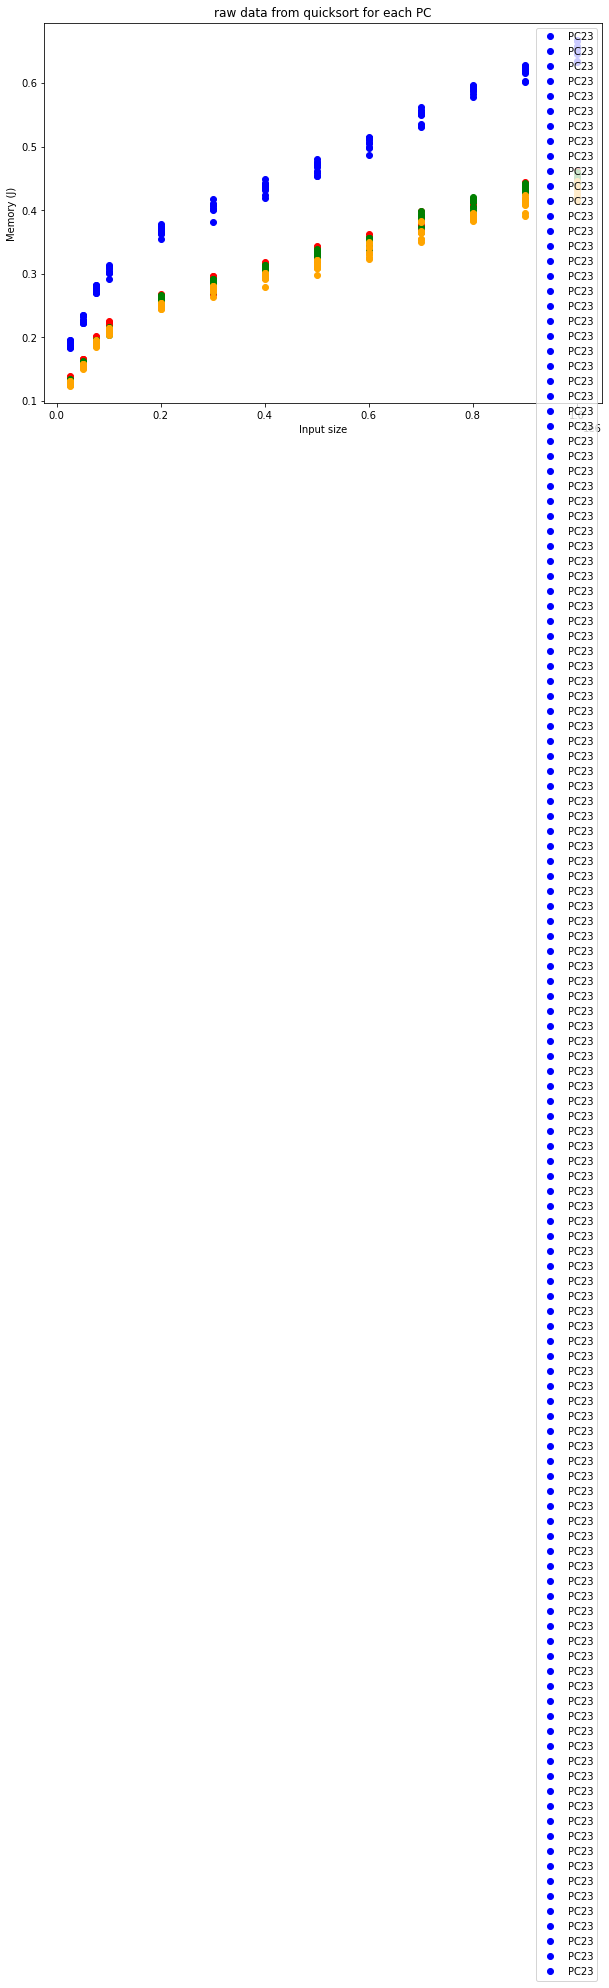

In [156]:
c = "best" 
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Memory - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Memory - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Memory - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Memory - readCSV"],"o", color = "orange")

plt.title("readCSV subtracted from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Memory (J) - readCSV Memory (J)")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Memory (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Memory (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Memory (J)"],"o", color = "blue", label="PC23")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Memory (J)"],"o", color = "orange")
plt.title("raw data from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Memory (J)")
plt.legend()
plt.show()

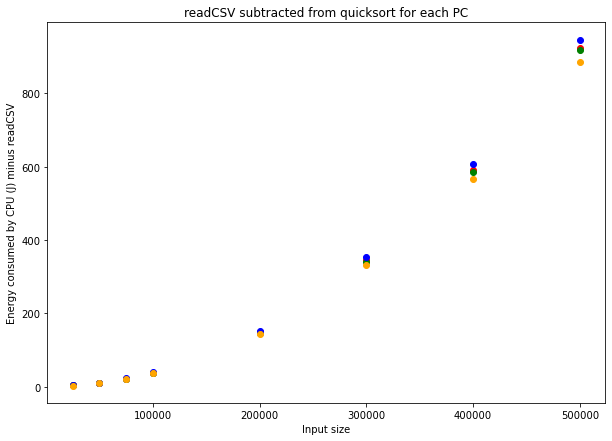

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


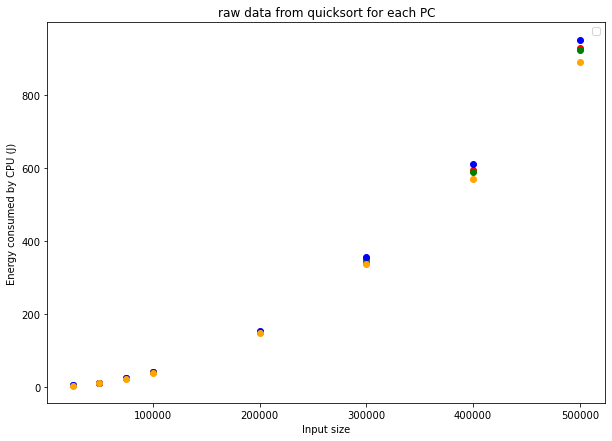

In [157]:
c = "worst" 
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == c:
        plt.plot( mean16[i]["Size"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == c:
        plt.plot( mean21[i]["Size"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == c:
        plt.plot( mean23[i]["Size"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == c:
        plt.plot( mean6[i]["Size"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.title("readCSV subtracted from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J) minus readCSV")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == c:
        plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == c:
        plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == c:
        plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == c:
        plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("raw data from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()

# Temp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


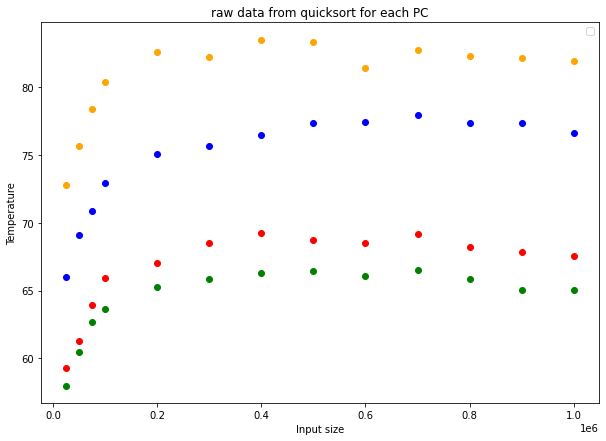

In [158]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["Temperature"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["Temperature"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["Temperature"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["Temperature"],"o", color = "orange")
plt.title("raw data from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


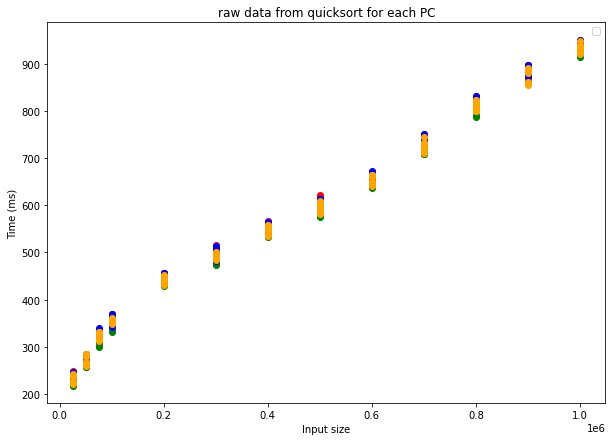

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


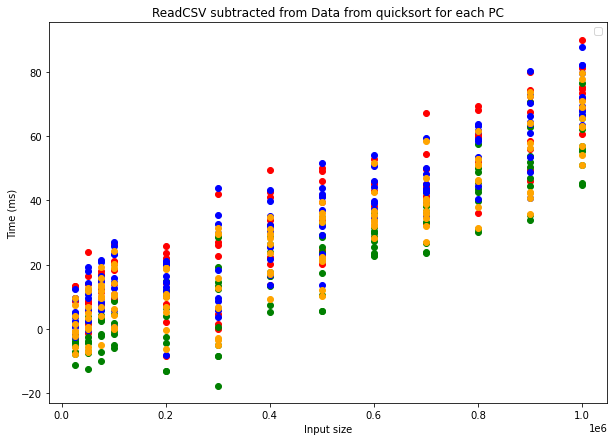

In [159]:
c = "worst"
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Time (ms)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Time (ms)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Time (ms)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Time (ms)"],"o", color = "orange")
plt.title("raw data from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"].startswith("random"):
        plt.plot( mean16[i]["Size"],mean16[i]["Time - readCSV"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"].startswith("random"):
        plt.plot( mean21[i]["Size"],mean21[i]["Time - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"].startswith("random"):
        plt.plot( mean23[i]["Size"],mean23[i]["Time - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"].startswith("random"):
        plt.plot( mean6[i]["Size"],mean6[i]["Time - readCSV"],"o", color = "orange")
plt.title("ReadCSV subtracted from Data from quicksort for each PC")
plt.xlabel("Input size")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

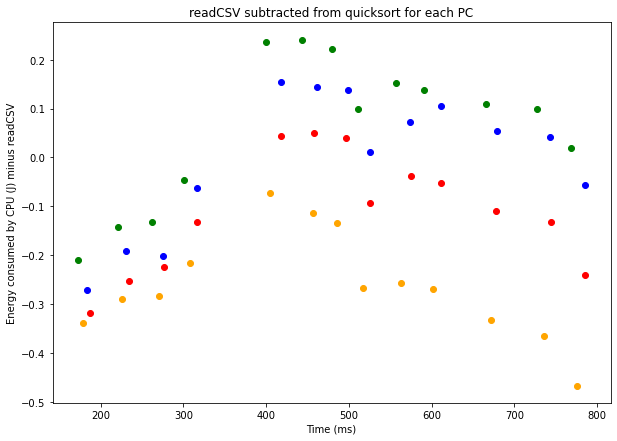

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


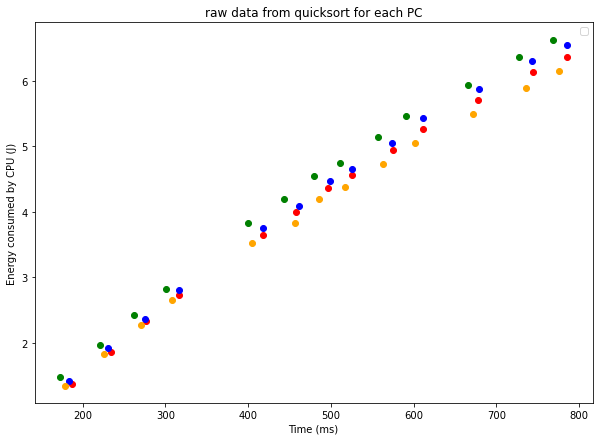

In [165]:
c = "best" 
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == c:
        plt.plot( mean16[i]["Time (ms)"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == c:
        plt.plot( mean21[i]["Time (ms)"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == c:
        plt.plot( mean23[i]["Time (ms)"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == c:
        plt.plot( mean6[i]["Time (ms)"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.title("readCSV subtracted from quicksort for each PC")
plt.xlabel("Time (ms)")
plt.ylabel("Energy consumed by CPU (J) minus readCSV")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == c:
        plt.plot( mean16[i]["Time (ms)"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == c:
        plt.plot( mean21[i]["Time (ms)"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == c:
        plt.plot( mean23[i]["Time (ms)"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == c:
        plt.plot( mean6[i]["Time (ms)"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("raw data from quicksort for each PC")
plt.xlabel("Time (ms)")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()

#### Mergesort


#### Countingsort

#### Bubblesort